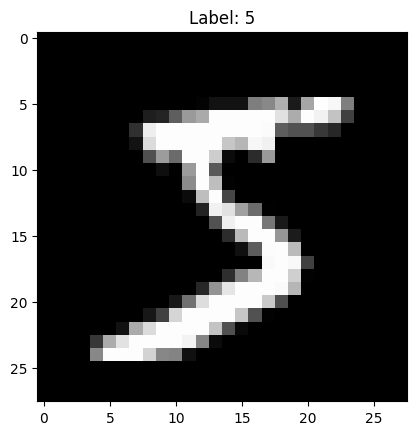

In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Загрузка MNIST-датасета
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Визуализация примера изображения
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [32]:
# Нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding для меток
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [35]:
# Создаем нейронную сеть
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Преобразуем изображение 28x28 в плоский вектор
    Dense(128, activation='relu'),  # Скрытый слой с 128 нейронами
    Dense(64, activation='relu'),   # Еще один скрытый слой
    Dense(10, activation='softmax') # Выходной слой с 10 классами
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9891 - loss: 0.0343 - val_accuracy: 0.9732 - val_loss: 0.1015
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9908 - loss: 0.0276 - val_accuracy: 0.9769 - val_loss: 0.0923
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9938 - loss: 0.0183 - val_accuracy: 0.9747 - val_loss: 0.0938
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9935 - loss: 0.0198 - val_accuracy: 0.9733 - val_loss: 0.1137
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9935 - loss: 0.0187 - val_accuracy: 0.9787 - val_loss: 0.1057


In [42]:
# Оценка на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


313/313 - 1s - 3ms/step - accuracy: 0.9773 - loss: 0.1010
Test accuracy: 0.98


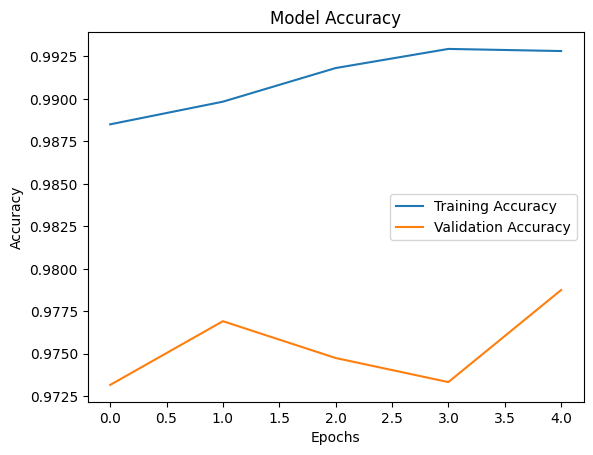

In [43]:
# График точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


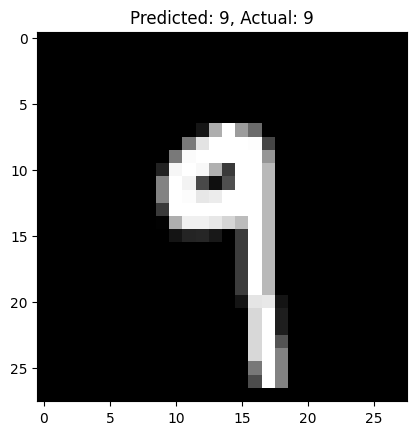

In [45]:
import numpy as np

# Выбираем случайное изображение из тестовой выборки
index = np.random.randint(0, x_test.shape[0])
image = x_test[index]
label = y_test[index]

# Делаем предсказание
prediction = model.predict(image.reshape(1, 28, 28))
predicted_label = prediction.argmax()

# Визуализация
plt.imshow(image, cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {label.argmax()}")
plt.show()
